In [29]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
plt.style.use(["science", "grid"])

# Simulator
Use a system's ODE's to simulate the evolution of the system with its natural dynamics ($\vec{u} = \vec{0}$) given some initial state. This uses a Runge-Kutta 4th-order integrator.

In [2]:
def simulate(system, time, x_0):
    times = np.linspace(0, time, int(1/system.dt * time + 1))
    n_tsteps = len(times)
    
    states = np.empty(shape=(n_tsteps, system.nx))
    control = system.null_action
    
    for t in range(n_tsteps):
        states[t] = system.integrator.step(x_0, control)
        x_0 = states[t]
    
    return times, states

# Pendulum
Try MPPI controller with a pendulum:
![alternatvie text](http://underactuated.mit.edu/figures/simple_pend.svg)

The state-space representation of the system is $x = (\theta, \dot{\theta})$, $u = \tau$, and the dynamics of the inverted pendulum are given by:
$$
\begin{align*}
    \dot{\theta} &= \dot{\theta} \\
    \ddot{\theta} &= \frac{\tau - mgl\sin(\theta) - b\dot{\theta}}{ml^2}
\end{align*}
$$

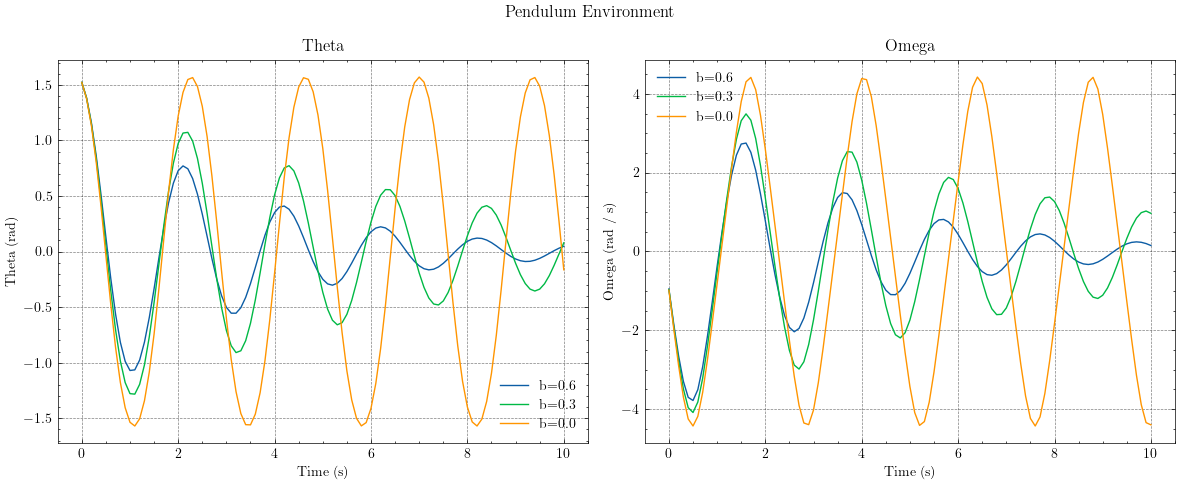

In [31]:
from dynamical_systems import Pendulum

p1 = Pendulum(m=1, l=1, b=0.6, dt=1/10)
times, states1 = simulate(p1, 10, np.array([np.radians(90), 0]))

p2 = Pendulum(m=1, l=1, b=0.3, dt=1/10)
times, states2 = simulate(p2, 10, np.array([np.radians(90), 0]))

p3 = Pendulum(m=1, l=1, b=0.0, dt=1/10)
times, states3 = simulate(p3, 10, np.array([np.radians(90), 0]))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Pendulum Environment")

ax1.plot(times, states1[:, 0], label="b=0.6")
ax1.plot(times, states2[:, 0], label="b=0.3")
ax1.plot(times, states3[:, 0], label="b=0.0")
ax1.set(ylabel="Theta (rad)", xlabel="Time (s)", title="Theta")
ax1.legend(loc="best")

ax2.plot(times, states1[:, 1], label="b=0.6")
ax2.plot(times, states2[:, 1], label="b=0.3")
ax2.plot(times, states3[:, 1], label="b=0.0")
ax2.set(ylabel="Omega (rad / s)", xlabel="Time (s)", title="Omega")
ax2.legend(loc="best")

plt.tight_layout()

# Cart-Pole
Try MPPI controller with a cart-pole system:

![alternatvie text](http://underactuated.mit.edu/figures/cartpole.svg)

The state-space representation of the system is $x = (x, \dot{x}, \theta, \dot{\theta})$, $u = f_x$, and the dynamics of the inverted pendulum are given by:
$$
\begin{align*}
    \dot{x} &= \dot{x} \\
    \ddot{x} &= \frac{1}{m_c+m_p\sin^2(\theta)} \left( f_x + m_p\sin(\theta) (l\dot{\theta}^2 + g\cos(\theta)) \right) \\
    \dot{\theta} &= \dot{\theta} \\
    \ddot{\theta} &= \frac{1}{l(m_c+m_p\sin^2(\theta))} \left( -f_x\cos(\theta) - m_p l \dot{\theta}^2 \cos(\theta)\sin(\theta) - (m_c + m_p)g\sin(\theta) \right)
\end{align*}
$$

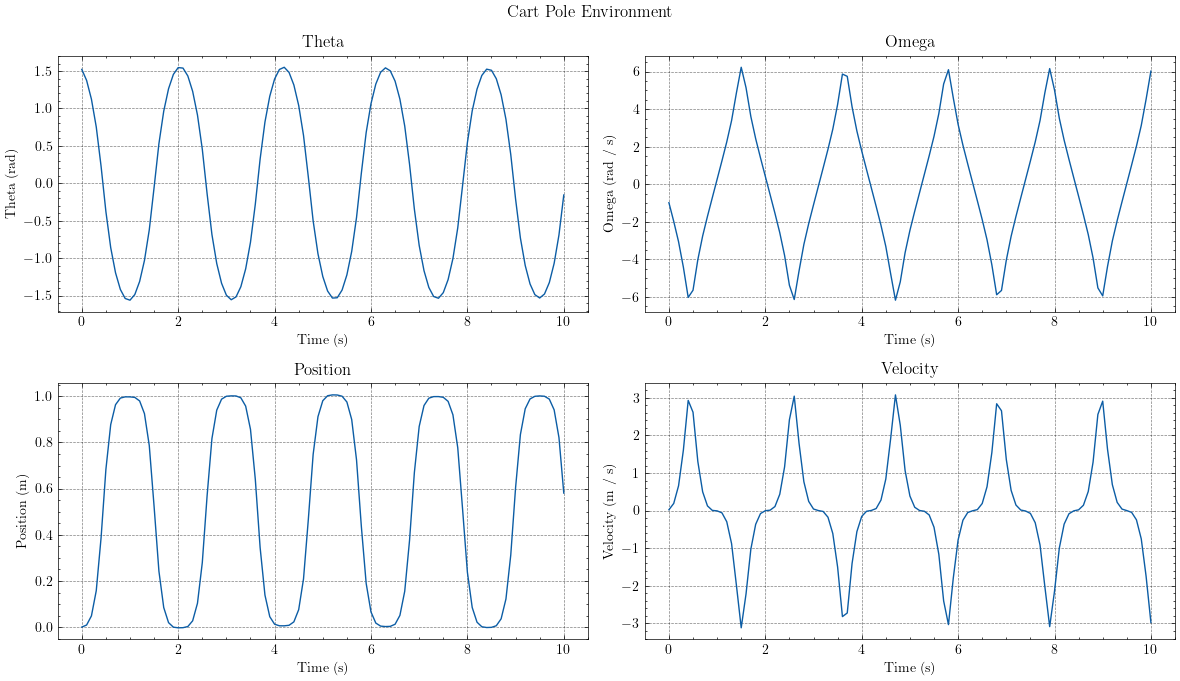

In [28]:
from dynamical_systems import CartPole

cp = CartPole(m_pole=1, m_cart=1, l=1, dt=1/10)
times, states = simulate(cp, 10, np.array([0, 0, np.radians(90), 0]))

fig, ax = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle("Cart Pole Environment")

ax[0][0].plot(times, states[:, 2])
ax[0][0].set(ylabel="Theta (rad)", xlabel="Time (s)", title="Theta")
ax[0][1].plot(times, states[:, 3])
ax[0][1].set(ylabel="Omega (rad / s)", xlabel="Time (s)", title="Omega")

ax[1][0].plot(times, states[:, 0])
ax[1][0].set(ylabel="Position (m)", xlabel="Time (s)", title="Position")
ax[1][1].plot(times, states[:, 1])
ax[1][1].set(ylabel="Velocity (m / s)", xlabel="Time (s)", title="Velocity")

plt.tight_layout()